## Building a Content Based Recommendation System

Dataset URL - https://github.com/zygmuntz/goodbooks-10k/releases

In [3]:
!pip install pandas

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
distutils: /home/sayali/snap/jupyter/common/include/python3.7m/UNKNOWN
sysconfig: /home/sayali/snap/jupyter/common/include/python3.7/UNKNOWN
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/snap/jupyter/6/bin/python -m pip install --upgrade pip' command.


In [6]:
pip install --user -U nltk

     |████████████████████████████████| 1.5 MB 2.1 MB/s eta 0:00:01     |██████████████████████████▋     | 1.2 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 1.9 MB/s  eta 0:00:01
     |████████████████████████████████| 76 kB 791 kB/s eta 0:00:01
     |████████████████████████████████| 722 kB 4.5 MB/s eta 0:00:01
  distutils: /home/sayali/snap/jupyter/common/include/python3.7m/zipp
  sysconfig: /home/sayali/snap/jupyter/common/include/python3.7/zipp
  user = True
  home = None
  root = None
  prefix = None
  distutils: /home/sayali/snap/jupyter/common/include/python3.7m/typing-extensions
  sysconfig: /home/sayali/snap/jupyter/common/include/python3.7/typing-extensions
  distutils: /home/sayali/snap/jupyter/common/include/python3.7m/importlib-metadata
  sysconfig: /home/sayali/snap/jupyter/common/include/python3.7/importlib-metadata
  distutils: /home/sayali/snap/jupyter/common/include/python3.7m/tqdm
  sysconfig: /home/sayali/snap/jupyter/common/include/python3.7

In [2]:
!pip install requests

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 62 kB 145 kB/s eta 0:00:011
     |████████████████████████████████| 138 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 59 kB 372 kB/s eta 0:00:011
  distutils: /home/sayali/snap/jupyter/common/include/python3.7m/urllib3
  sysconfig: /home/sayali/snap/jupyter/common/include/python3.7/urllib3
  user = True
  home = None
  root = None
  prefix = None
  distutils: /home/sayali/snap/jupyter/common/include/python3.7m/idna
  sysconfig: /home/sayali/snap/jupyter/common/include/python3.7/idna
  distutils: /home/sayali/snap/jupyter/common/include/python3.7m/charset-normalizer
  sysconfig: /home/sayali/snap/jupyter/common/include/python3.7/charset-normalizer
  distutils: /home/sayali/snap/jupyter/common/include/python3.7m/requests
  sysconfig: /home/sayali/sn

In [6]:
!pip install rake_nltk

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7829 sha256=f80867f31400b5065ed2f93609522b6b027b8f9705fb054c029fef916df4e987
  Stored in directory: /home/sayali/snap/jupyter/6/.cache/pip/wheels/7c/d9/8a/b8a9244fa89a07f288f9fe006aafc79d93fceb58496c29b606
Successfully built rake-nltk
  distutils: /home/sayali/snap/jupyter/common/include/python3.7m/rake-nltk
  sysconfig: /home/sayali/snap/jupyter/common/include/python3.7/rake-nltk
  user = True
  home = None
  root = None
  prefix = None
distutils: /home/sayali/snap/jupyter/common/include/python3.7m/UNKNOWN
sysconfig: /home/sayali/snap/jupyter/common/include/python3.7/UNKNOWN
You should consider upgrading via the '/snap/jupyter/6/bin/python -m pip install --upgrade pip' command.


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns',100)


from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

tfidf_vectorizer = TfidfVectorizer()



from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
# Reading the file
df = pd.read_csv("/home/sayali/Desktop/BookBarn/goodreads/data.csv")
#Reading the first five records
df.head()


/home/sayali/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


,Unnamed: 0,Desc,Unnamed: 0.1,author,genre,image_link,rating,title
0,0,We know that power is shifting: From West to E...,0.0,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,3,William J. Bernstein is an American financial ...,3.0,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,4,Amazing book. And I joined Steve Jobs and many...,4.0,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


In [10]:
df = df[['title','genre','author','rating']]
df.head()

,title,genre,author,rating
0,The End of Power: From Boardrooms to Battlefie...,Business,Moisés Naím,3.63
1,"Console Wars: Sega, Nintendo, and the Battle t...",Business,Blake J. Harris,3.94
2,Trust Agents: Using the Web to Build Influence...,Business,Chris Brogan,3.78
3,The Four Pillars of Investing,Business,William J. Bernstein,4.20
4,Made in Japan: Akio Morita and Sony,Business,Akio Morita,4.05


<AxesSubplot:>

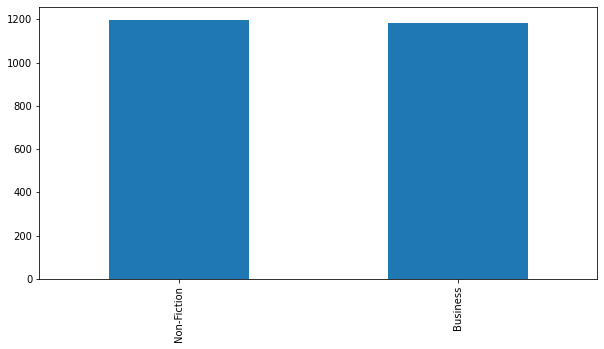

In [14]:
# Genre distribution
df['genre'].value_counts().plot(x = 'genre', y ='count', kind = 'bar', figsize = (10,5)  )

<AxesSubplot:title={'center':'Word Count Distribution for book descriptions'}, ylabel='Frequency'>

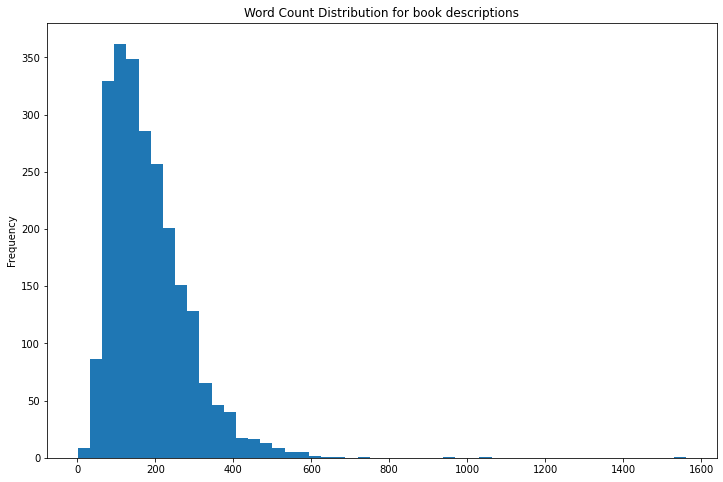

In [17]:
# Calculating the word count for book description
df['word_count'] = df['Desc'].apply(lambda x: len(str(x).split()))
# Plotting the word count
df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions')

In [18]:
# Printing the book title and description randomly
df['title'] [367]
df['Desc'][367]

'Finalist for the 2015\xa0Financial Times\xa0and McKinsey Business Book of the YearBest business book of the week from Inc.comThe author of Power, Stanford business school professor, and a leading management thinker offers a hard-hitting dissection of the leadership industry and ways to make workplaces and careers work better.The leadership enterprise is enormous, with billions of dollars, thousands of books, and hundreds of thousands of blogs and talks focused on improving leaders. But what we see worldwide is employee disengagement, high levels of leader turnover and career derailment, and failed leadership development efforts.In Leadership BS, Jeffrey Pfeffer shines a bright light on the leadership industry, showing why it’s failing and how it might be remade. He sets the record straight on the oft-made prescriptions for leaders to be honest, authentic, and modest, tell the truth, build trust, and take care of others. By calling BS on so many of the stories and myths of leadership, 

##Bigram distribution for the book description

<AxesSubplot:title={'center':'Bigram disribution for the top 20 words in the book description'}, xlabel='bigram'>

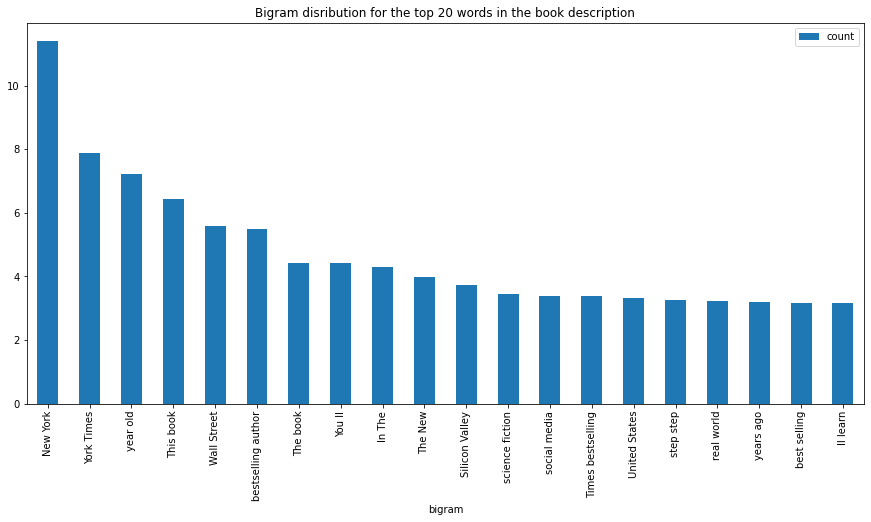

In [4]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Desc'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)
#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

##Trigram distribution for the book description

<AxesSubplot:title={'center':'Trigram disribution for the top 20 words in the book description'}, xlabel='trigram'>

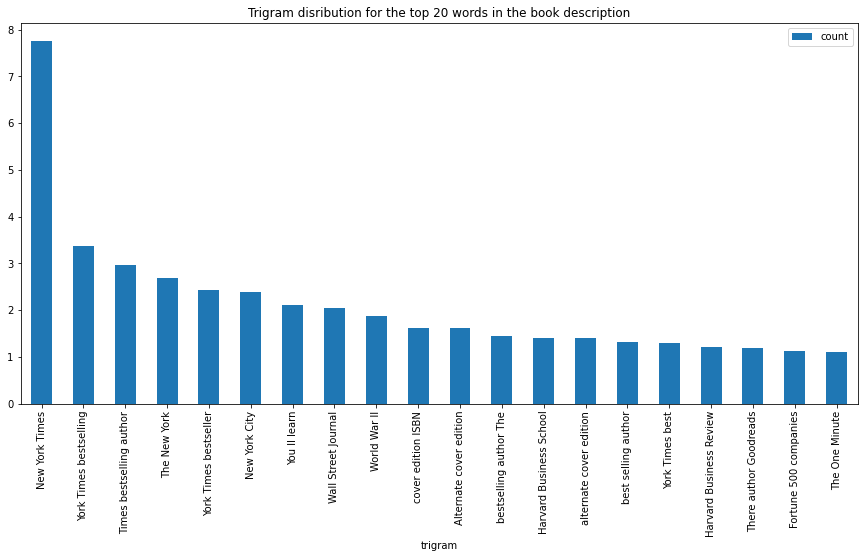

In [6]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Desc'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)
#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Trigram disribution for the top 20 words in the book description", figsize = (15,7), )

In [10]:
pip install nltk

distutils: /home/sayali/snap/jupyter/common/include/python3.7m/UNKNOWN
sysconfig: /home/sayali/snap/jupyter/common/include/python3.7/UNKNOWN
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/snap/jupyter/6/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Using Abhishek Thakur's arguments for TF-IDF
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')


In [39]:
df.shape


(2382, 8)

##Recommendation based on the book title

In [12]:
# Function for recommending books based on Book title. It takes book title and genre as an input.
def recommend(title, genre):
    
    # Matching the genre with the dataset and reset the index
    data = df.loc[df['genre'] == genre]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    
    indices = pd.Series(data.index, index = data['title'])
    
    
        
    #Converting the book title into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['title'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]
# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))
# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
# Scores of the 5 most similar books 
    sig = sig[1:6]
# Book indicies
    movie_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
   
    rec = data[['title', 'image_link']].iloc[movie_indices]
       
    # It reads the top 5 recommend book url and print the images
    
    for i in rec['image_link']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        print(plt.imshow(img))

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


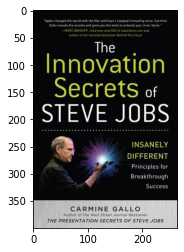

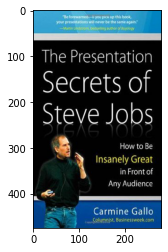

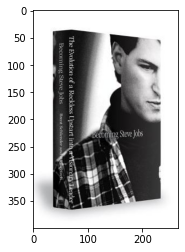

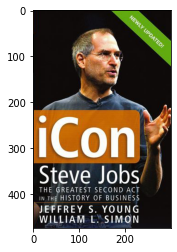

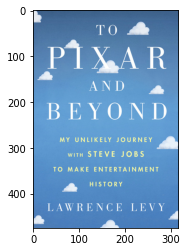

In [13]:
recommend("Steve Jobs", "Business")

Recommendation based on the book description

In [18]:
# Function for recommending books based on Book title. It takes book title and genre as an input.
def recommend(title, genre):
    
    global rec
    # Matching the genre with the dataset and reset the index
    data = df.loc[df['genre'] == genre]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    
    #Converting the book description into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['cleaned_desc'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]
# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))
# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
# Scores of the 5 most similar books 
    sig = sig[1:6]
# Book indicies
    movie_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['title', 'image_link']].iloc[movie_indices]
    
    # It reads the top 5 recommend book url and print the images
    
    for i in rec['image_link']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        print(plt.imshow(img))

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


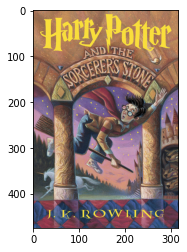

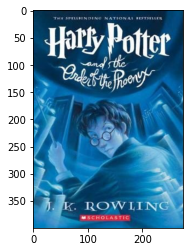

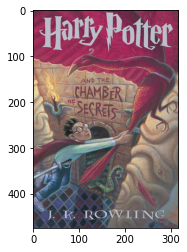

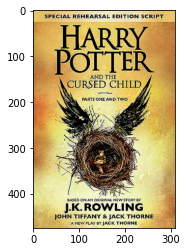

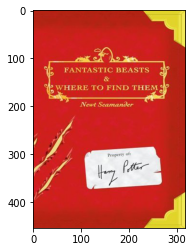

In [19]:
recommend("Harry Potter and the Prisoner of Azkaban", "Non-Fiction")